# Review
Hi, my name is Dmitry and I will be reviewing your project.

You can find my comments in colored markdown cells:

<div class="alert alert-success">
    If everything is done successfully.
</div>

<div class="alert alert-warning">
    If I have some (optional) suggestions, or questions to think about, or general comments.
</div>

<div class="alert alert-danger">
    If a section requires some corrections. Work can't be accepted with red comments.
</div>

Please don't remove my comments, as it will make further review iterations much harder for me.

Feel free to reply to my comments or ask questions using the following template:

<div class="alert alert-info">
    For your comments and questions.
</div>

First of all, thank you for turning in the project! You did a pretty good job overall, but there are a couple of small problems that need to be fixed before the code can be accepted. Good luck!

<div class="alert alert-info">
    Thank you for this review! It's not hard to resolve my mistakes but it is sad that this mistakes are conceptual ones.
</div>

<div class="alert alert-success">
    <b>Reviewer's comment V2</b><br>
    You're welcome! Don't beat yourself up too much! It's easy to let target leakage slip in, just make sure to double check everything if your model shows suspiciously good performance (especially close to perfect). As for the cross-validation on the train set, hopefully you'll remember this going forward :)<br><br>
    Based on the ROC-AUC of your final model, you've got 6 SP. Congratulations!
</div>

## TOC:
* [1. Work Plan](#work_plan)
* [2. Goal](#goal)
* [3. Load data and EDA](#load)
** [3.1 Import files and check general information](#2nd_import)
** * [3.1.1 df_contract](#3rd_1st_file)
** * [3.1.2 df_personal](#3rd_2nd_file)
** * [3.1.3 df_internet](#3rd_3rd_file)
** * [3.1.4 df_phone](#3rd_4th_file)
** [3.1 Mini conclusion](#Mini_conclusion3.1)
** [3.2 EDA](#2nd_EDA)
** * [3.2.1 type of data](#types)
** * [- BeginDate](#begindate)
** * [- EndDate & Contract_period](#period)
** * [- TotalCharges](#total)
** * [3.2.2 Merge data](#merge)
** * [3.2.3 OHE](#ohe)
** * [- df_contract_ohe](#contract_ohe)
** * [- df_personal_ohe](#personal_ohe)
** * [- df_internet_ohe](#internet_ohe)
** * [- df_phone_ohe](#phone_ohe)
** [3.2 Mini conclusion](#Mini_conclusion3.2)
** [3.3 Data analysis](#da)
* [4. Develop models](#ML)
** [4.1 Split features and target](#features)
** [4.2 ML Models](#ml)
** * [4.2.1 Sanity check](#dummy)
** * [4.2.2 LogisticRegression](#linear)
** * [4.2.3 DecisionTreeClassifier](#tree)
** * [4.2.4 RandomForestClassifier](#forest)
** * [4.2.5 CatBoostClassifier](#cat)
** [4.2 Mini conclusion](#Mini_conclusion4.2)
* [5. Results](#results)
* [6. Solution Report](#report)

# 1.Work Plan <a class="anchor" id="work_plan"></a>

You're going to have to preform an exploratory data analysis (EDA). At the end of Jupyter Notebook, write: <br>
[ ] A list of clarifying questions <br>
[ ] A rough plan for solving the task, specifying 3-5 basic steps and explaining each step in one or two sentences <br>
<br> The team leader will check your questions and work plan. Questions will be answered during a video call. <br> 
The code will be reviewed by the team leader only if there are some areas of doubt.

# 2.Goal <a class="anchor" id="goal"></a>
The telecom operator Interconnect would like to be able to **forecast their churn of clients**. <br>
If it's discovered that a user is planning to leave, they will be **offered promotional codes and special plan options**. <br>
Interconnect's marketing team has collected some of their clientele's personal data, including information about their plans and contracts.

# 3.Load data and EDA <a class="anchor" id="load"></a>
- `contract.csv` — contract information
- `personal.csv` — the client's personal data
- `internet.csv` — information about Internet services
- `phone.csv` — information about telephone services

In [235]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# work with text/strings
import re

# ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

In [236]:
# current day/dataset was downloaded
# change it, if we update the dataset

day_dataset = '2020-02-01'

## 3.1 Import files and check general information <a class="anchor" id="2nd_import"></a>

In [237]:
# import data from files

df_contract = pd.read_csv('datasets\contract.csv')
df_personal = pd.read_csv('datasets\personal.csv')
df_internet = pd.read_csv('datasets\internet.csv')
df_phone = pd.read_csv('datasets\phone.csv')

### 3.1.1 df_contract <a class="anchor" id="3rd_1st_file"></a>

In [238]:
# print 5 first rows

df_contract.head()

In [239]:
# check info about contracts

df_contract.info()

In [240]:
# check duplicates

print('Number of duplicated rows (all columns): {:.0f}'.format(df_contract.duplicated().sum()))
print('Number of duplicated rows (only IDs): {:.0f}'.format(df_contract.duplicated(subset=['customerID']).sum()))

In [241]:
df_contract.columns

**So...**<br>
We have 7043 clients. <br>
There are no duplicated rows. <br>
There are no N/A values. <br>
BeginDate and EndDate are not date type, so we can change it. <br>
<br> Description of columns: <br>
'customerID' - customer's ID <br>
'BeginDate' - date when contract started <br>
'EndDate' - date when contract will end (if it is appliable) <br>
'Type' - type of contract period: month or year <br>
'PaperlessBilling' - paperless billing **likely useless** boolean parameter <br>
'PaymentMethod' - payment method <br>
'MonthlyCharges' - monthly charge <br>
'TotalCharges' - total charge <br>

### 3.1.2 df_personal <a class="anchor" id="3rd_2nd_file"></a>

In [242]:
# print 5 first rows

df_personal.head()

In [243]:
# check info about contracts

df_personal.info()

In [244]:
# check duplicates

print('Number of duplicated rows (all columns): {:.0f}'.format(df_personal.duplicated().sum()))
print('Number of duplicated rows (only IDs): {:.0f}'.format(df_personal.duplicated(subset=['customerID']).sum()))

In [245]:
df_personal.columns

**So...**<br>
7043 rows. <br>
There are no duplicated rows. <br>
There are no N/A values. <br>
<br>
Description of columns: <br>
'customerID' - IDs<br>
'gender' - gender <br>
'SeniorCitizen' - elderly person, especially one who is retired and living on a pension (True/False) <br>
'Partner' - **(???)** maybe if customer has a spouse?<br>
'Dependents' - a person who relies on another, especially a family member, for financial support <br>



### 3.1.3 df_internet <a class="anchor" id="3rd_3rd_file"></a>

In [246]:
df_internet.head()

In [247]:
# check info about contracts

df_internet.info()

In [248]:
# check duplicates

print('Number of duplicated rows (all columns): {:.0f}'.format(df_internet.duplicated().sum()))
print('Number of duplicated rows (only IDs): {:.0f}'.format(df_internet.duplicated(subset=['customerID']).sum()))

In [249]:
df_internet.columns

**So...**<br>
We have only 5517 rows. <br>
There are no duplicated rows. <br>
There are no N/A values. <br>
<br>
Description of columns: <br>
'customerID' - IDs<br>
'InternetService' - type of network setup <br>
'OnlineSecurity' - **SERVICE:** Internet security: a malicious website blocker <br>
'OnlineBackup' - **SERVICE:** Cloud file storage and data backup <br>
'DeviceProtection' - **SERVICE:** Internet security: antivirus software <br>
'TechSupport' - **SERVICE:** A dedicated technical support line <br>
'StreamingTV' - **SERVICE:** TV streaming <br>
'StreamingMovies' - **SERVICE:** movie directory <br>

### 3.1.4 df_phone <a class="anchor" id="3rd_4th_file"></a>

In [250]:
df_phone.head()

In [251]:
# check info about contracts

df_phone.info()

In [252]:
# check duplicates

print('Number of duplicated rows (all columns): {:.0f}'.format(df_phone.duplicated().sum()))
print('Number of duplicated rows (only IDs): {:.0f}'.format(df_phone.duplicated(subset=['customerID']).sum()))

In [253]:
df_phone.columns

**Mini conclusion** <br> <a class="anchor" id="Mini_conclusion3.1"></a>
1. We successfully imported datasets <br>
2. 7043 clients <br>
3. There are no duplicated rows. There are no N/A values. <br>
4. However some clients use only internet service, some of them use only phone. <br>
After merging some N/A-values will appear. But we can use this information, that people do not use some service. <br>
5. We should change type of some columns. <br>

## 3.2 EDA <a class="anchor" id="2nd_EDA"></a>

### 3.2.1 type of data <a class="anchor" id="types"></a>

#### - df_contract: BeginDate <a class="anchor" id="begindate"></a>

In [254]:
df_contract.head()

In [255]:
# check type of date and change type to Timestamp

print('Type of data in BeginDate: {:}'.format(
        type(df_contract['BeginDate'][0])))

df_contract['BeginDate'] = pd.to_datetime(df_contract['BeginDate'], format='%Y-%m-%d')

In [256]:
# what is the date?

df_contract['BeginDate'].dt.day.unique()

**So...**<br>
We need only year and month here <br>
Add these values in table.

In [257]:
df_contract['Begin_year'] = df_contract['BeginDate'].dt.year
df_contract['Begin_month'] = df_contract['BeginDate'].dt.month

In [258]:
print("Minimal Date when contract has been signed:", df_contract['BeginDate'].min())
print("Minimal Date when contract has been signed:", df_contract['BeginDate'].max())

#### - df_contract: EndDate & Contract_period <a class="anchor" id="period"></a>

In [259]:
df_contract['EndDate'].unique()

**So...** There are only 4 values.

In [260]:
# calculate period of contract
# when contract is valid, we calculate it according parameter: day_dataset
# day_dataset is February 1, 2020 (current day/dataset was downloaded).
df_contract['Contract_period'] = df_contract.query('EndDate != "No"')['EndDate']
df_contract['Contract_period'] = df_contract['Contract_period'].fillna(day_dataset)
df_contract['Contract_period'] = pd.to_datetime(df_contract['Contract_period'], format='%Y-%m-%d %H:%M:%S')
df_contract['Contract_period'] = (df_contract['Contract_period'] - df_contract['BeginDate']).dt.days

# create target: column with information about if the contract is valid
df_contract['Valid_client'] = [1 if x==True else 0 for x in df_contract['EndDate'] == "No" ]

In [261]:
# drop 'EndDate' and 'BeginDate'
# because we save this information in 'Contract_period' and 'Valid_client'
# and in 'Begin_year' and 'Begin_month'
df_contract = df_contract.drop(columns=['EndDate','BeginDate'])

#### - df_contract: TotalCharges <a class="anchor" id="total"></a>

In [262]:
df_contract['TotalCharges'].unique()

In [263]:
try:
    df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)
except:
    print('There is some problems with TotalCharges. Cannot convert type')

In [264]:
# try to find the index where there is a problem
index = 0
list_index = []
for text in df_contract['TotalCharges']:
    numbers_float = re.findall(r"[0-9]*\.[0-9]*", text)
    numbers_int = re.findall(r"\d+", text)
    if len(numbers_float) != 1 and len(numbers_int) != 1:
        print(index, text)
        list_index.append(index)    
    index += 1

So, we see, that the problem with rows, where no information about TotalCharges; " "-values

In [265]:
df_contract.iloc[list_index]

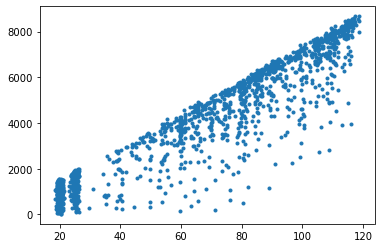

In [266]:
# try to find a correlation between MonthlyCharges and TotalCharges
#x = df_contract[df_contract['TotalCharges'] != " " and df_contract['TotalCharges'] == 'Two year']['MonthlyCharges']
x = df_contract.query('TotalCharges != " " and Type == "Two year"')['MonthlyCharges']
y = df_contract.query('TotalCharges != " " and Type == "Two year"')['TotalCharges'].astype(float)

#y = df_contract[df_contract['TotalCharges'] != " "]['TotalCharges'].astype(float)

plt.figure()
plt.plot(x,y,'.')
plt.show()

Strictly say, we can't use this correlation

In [267]:
print('Remove only {:.2%} rows'.format(len(list_index) / len(df_contract)))

In [268]:
# remove this values

df_contract = df_contract.drop(list_index, axis=0)
df_contract = df_contract.reset_index(drop=True)

In [269]:
try:
    df_contract['TotalCharges'] = df_contract['TotalCharges'].astype(float)
except:
    print('There is some problems with TotalCharges. Cannot convert type')

### 3.2.2 Merge data <a class="anchor" id="merge"></a>

In [270]:
df = df_contract.   \
    merge(df_personal, on='customerID', how='left').   \
    merge(df_internet, on='customerID', how='left').   \
    merge(df_phone, on='customerID', how='left')

In [271]:
df

We have N/A-values in some columns. <br>
In this case absence of values is **important**. So we will reserve this values in OHE

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Dataframes were merged correctly
</div>

### 3.2.3 OHE <a class="anchor" id="ohe"></a>

#### - df_contract_ohe <a class="anchor" id="contract_ohe"></a>

In [272]:
# we can apply OHE in 'Type'
# there are only 3 columns

print(df['Type'].unique())

# we can apply OHE in 'PaperlessBilling'
# there are only 2 columns

print(df['PaperlessBilling'].unique())

# we can apply OHE in 'PaymentMethod'
# there are only 4 columns

print(df['PaymentMethod'].unique())

In [273]:
# OHE
# we have not got N/A values! so, we don't need use dummy_na

df = pd.get_dummies(
    df,
    columns=['Type', 'PaperlessBilling', 'PaymentMethod'],
    # dummy_na = True,
    drop_first=True)

#### - df_personal_ohe <a class="anchor" id="personal_ohe"></a>

In [274]:
# check if in gender only 2 values
print(df['gender'].unique())

# ohe in gender_male
df['gender_male'] = [1 if x == 'Male' else 0 for x in df['gender']]

# check if in Partner only 2 values
print(df['Partner'].unique())

# ohe in Partner
df['Partner_yes'] = [1 if x == 'Yes' else 0 for x in df['Partner']]

# check if in Dependents only 2 values
print(df_personal['Dependents'].unique())

# ohe in Dependents
df['Dependents_yes'] = [1 if x == 'Yes' else 0 for x in df['Dependents']]

In [275]:
df = df.drop(columns=['gender','Partner', 'Dependents'])

#### - df_internet_ohe <a class="anchor" id="internet_ohe"></a>

In [276]:
# check if in InternetService only 2 values
print('InternetService:', df['InternetService'].unique())

# check if in OnlineSecurity only 2 values
print('OnlineSecurity:', df['OnlineSecurity'].unique())

# check if in OnlineBackup only 2 values
print('OnlineBackup:', df['OnlineBackup'].unique())

# check if in DeviceProtection only 2 values
print('DeviceProtection:', df['DeviceProtection'].unique())

# check if in TechSupport only 2 values
print('TechSupport:', df['TechSupport'].unique())

# check if in StreamingTV only 2 values
print('StreamingTV:', df['StreamingTV'].unique())

# check if in StreamingMovies only 2 values
print('StreamingMovies:', df['StreamingMovies'].unique())

In [277]:
# OHE

df = pd.get_dummies(
    df,
    columns=['InternetService', 'OnlineSecurity', 'OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies'],
    dummy_na = True,
    drop_first=True)

#### - df_phone_ohe <a class="anchor" id="phone_ohe"></a>

In [278]:
# check if in InternetService only 2 values
print('MultipleLines:', df['MultipleLines'].unique())

In [279]:
# create target: column with information about if the contract is valid
df = pd.get_dummies(
    df,
    columns=['MultipleLines'],
    dummy_na = True,
    drop_first=True)

In [280]:
df

In [281]:
df.info()

**Mini conclusion** <br> <a class="anchor" id="Mini_conclusion3.2"></a>
1. We dropped 0,016% of rows <br>
2. We changed type of data, prepared dates (remain only periods and starting months and years). <br>
3. We done OHE, so we have only numbers in merged dataset <br>
4. Merged table contains the most important information.

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    Categorical features were encoded
</div>

## 3.3 Data analysis <a class="anchor" id="da"></a>
I am going to do here Additional Assignment later (before the hard deadline).
Now I just plot some of interesting histograms.

In [282]:
df.columns

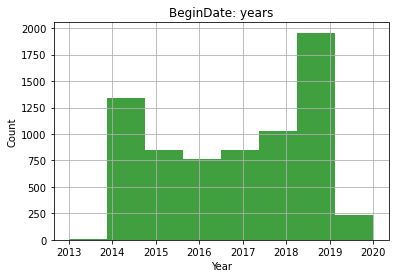

In [283]:
plt.hist(df_contract['Begin_year'], 8, facecolor='green', alpha=0.75)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('BeginDate: years')
plt.grid(True)

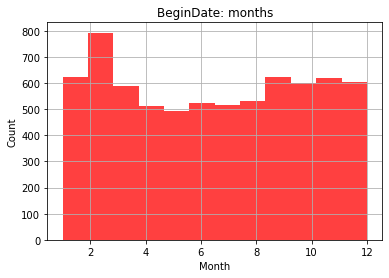

In [284]:
plt.hist(df_contract['Begin_month'], 12, facecolor='red', alpha=0.75)

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('BeginDate: months')
plt.grid(True)

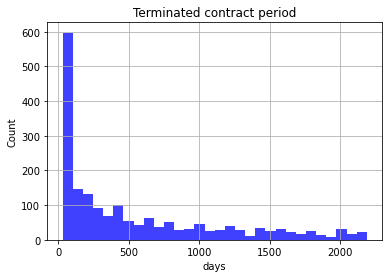

In [285]:
plt.hist(df[df['Valid_client'] == 0]['Contract_period'], 30, facecolor='blue', alpha=0.75)

plt.xlabel('days')
plt.ylabel('Count')
plt.title('Terminated contract period')
plt.grid(True)

Most of the users terminated their contracts in the first days

In [286]:
df_contract
df_personal
df_internet
df_phone

# 4.Develop models <a class="anchor" id="ML"></a>
- Linear Regression

## 4.1 Split features and target <a class="anchor" id="features"></a>

<div class="alert alert-info">
    So, I understand that period of ctontract is very important. We can drop month_begin and year_begin to solve this problem with data leakage. <br>
    So, we can't restore EndDate (where our target value).
</div>

<div class="alert alert-success">
    <b>Reviewer's comment V2</b><br>
    Sure, that works!
</div>

In [287]:
features = df.drop(columns=['customerID', 'Valid_client', 'Begin_year', 'Begin_month'])
target = df['Valid_client']

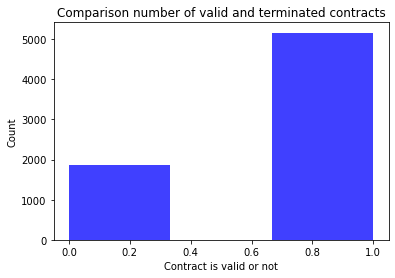

In [288]:
plt.hist(target, 3, facecolor='blue', alpha=0.75)

plt.xlabel('Contract is valid or not')
plt.ylabel('Count')
plt.title('Comparison number of valid and terminated contracts')

So, target is slightly unbalanced, but it is not a big problem here.

In [289]:
# we use stratify to reserve ratio of target in 

features_train, features_test, target_train, target_test = train_test_split(
                features, target, test_size=0.25, random_state=12345, stratify=target)

<div class="alert alert-success">
    <b>Reviewer's comment</b><br>
    The data was split into train and test
</div>

## 4.2 ML Models <a class="anchor" id="ml"></a>

### 4.2.1 Sanity check <a class="anchor" id="dummy"></a>
Most of clients have valid contracts, so in sanity check we predict "1". 

In [290]:
predicted_sanity_test = [1]*features_test.shape[0]
print("ROC-AUC score for sanity check model:", roc_auc_score(target_test, predicted_sanity_test))
print("Accuracy score for sanity check model:", accuracy_score(target_test, predicted_sanity_test))

### 4.2.2 LogisticRegression <a class="anchor" id="linear"></a>

<div class="alert alert-info">
    Find cross-validation on train dataset but not for all dataset as it was.
</div>

<div class="alert alert-success">
    <b>Reviewer's comment V2</b><br>
    Ok, great!
</div>

In [291]:
lr = LogisticRegression(solver='liblinear',
                        random_state=12345)

scores = cross_val_score(lr, features_train, target_train, cv=5, scoring='roc_auc')
print("Linear regression: mean_cross_val_score = {:.3f}".format(scores.mean()))

# train
lr.fit(features_train, target_train)

In [292]:
# predict probabilities
lr_probs = lr.predict_proba(features_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

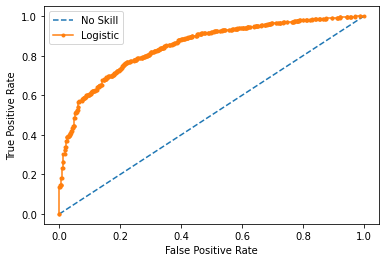

In [293]:
# calculate scores
ns_auc = roc_auc_score(target_test, predicted_sanity_test)
lr_auc = roc_auc_score(target_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(target_test, predicted_sanity_test)
lr_fpr, lr_tpr, _ = roc_curve(target_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [294]:
print("LogisticRegression test ROC-AUC: {:.3f}".format(
    roc_auc_score(target_test, lr_probs)))

In [295]:
lr_predicted = lr.predict(features_test)

print(classification_report(target_test, lr_predicted, digits=3))

<div class="alert alert-info">
    Update of results: LogisticRegression ROC-AUC: 0.849, accuracy: 0.809. <br>
</div>

### 4.2.3 DecisionTreeClassifier <a class="anchor" id="tree"></a>

<div class="alert alert-info">
    Corrected
</div>

In [302]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'max_depth': range(2, 15, 1),
    'min_samples_leaf':range(1,6,1)
}
# create RandomizedSearchCV
tree = RandomizedSearchCV(
    DecisionTreeClassifier(
        random_state=random_state_value
        ),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        n_iter=40)
# train model
tree.fit(features_train, target_train)

In [303]:
tree.best_params_

In [305]:
tree = DecisionTreeClassifier(max_depth=6,
                              min_samples_leaf=2,
                             random_state=12345)
scores = cross_val_score(tree, features_train, target_train, cv=5, scoring='roc_auc')
print("DecisionTreeClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

tree.fit(features_train, target_train)

In [306]:
# predict probabilities
tree_probs = tree.predict_proba(features_test)
# keep probabilities for the positive outcome only
tree_probs = tree_probs[:, 1]

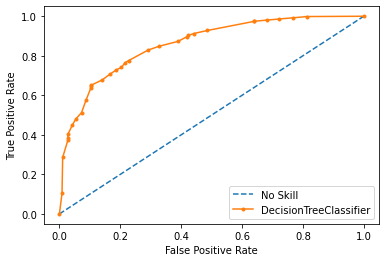

In [307]:
# calculate scores
ns_auc = roc_auc_score(target_test, predicted_sanity_test)
tree_auc = roc_auc_score(target_test, tree_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (tree_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(target_test, predicted_sanity_test)
tree_fpr, tree_tpr, _ = roc_curve(target_test, tree_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(tree_fpr, tree_tpr, marker='.', label='DecisionTreeClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [308]:
print("DecisionTreeClassifier test ROC-AUC: {:.3f}".format(
    roc_auc_score(target_test, tree_probs)))

In [309]:
tree_predicted = tree.predict(features_test)

print(classification_report(target_test, tree_predicted, digits=3))

<div class="alert alert-info">
    Update of results: DecisionTreeClassifier ROC-AUC: 0.859, accuracy: 0.818. <br>
</div>

### 4.2.4 RandomForestClassifier <a class="anchor" id="forest"></a>

<div class="alert alert-info">
    Corrected
</div>

In [318]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'max_depth': range(5, 15, 1),
    'min_samples_leaf':range(1,4,1),
    'n_estimators':range(100,400,50)
}
# create RandomizedSearchCV
rf = RandomizedSearchCV(
    RandomForestClassifier(
        random_state=random_state_value
        ),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,
        n_iter=40)
# train model
rf.fit(features_train, target_train)

In [319]:
rf.best_params_

In [320]:
rf = RandomForestClassifier(max_depth=10,
                              min_samples_leaf=3,
                              n_estimators=150,
                             random_state=12345)
scores = cross_val_score(rf, features_train, target_train, cv=5, scoring='roc_auc')
print("RandomForestClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

rf.fit(features_train, target_train)

In [321]:
# predict probabilities
rf_probs = rf.predict_proba(features_test)
# keep probabilities for the positive outcome only
rf_probs = rf_probs[:, 1]

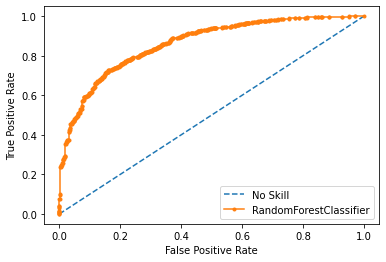

In [322]:
# calculate scores
ns_auc = roc_auc_score(target_test, predicted_sanity_test)
rf_auc = roc_auc_score(target_test, rf_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(target_test, predicted_sanity_test)
rf_fpr, rf_tpr, _ = roc_curve(target_test, rf_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='RandomForestClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [323]:
print("RandomForestClassifier test ROC-AUC: {:.3f}".format(
    roc_auc_score(target_test, rf_probs)))

In [324]:
rf_predicted = rf.predict(features_test)

print(classification_report(target_test, rf_predicted, digits=3))

<div class="alert alert-info">
    Update of results: RandomForestClassifier ROC-AUC: 0.863, accuracy: 0.823. <br>
</div>

### 4.2.5 CatBoostClassifier <a class="anchor" id="cat"></a>

<div class="alert alert-info">
    Corrected
</div>

In [270]:
%%time
# tuning parameters

# fixing random state
random_state_value = 110

# parameters
rs_params = {
    'iterations':range(100,1000,100),
    'learning_rate':np.arange(0.001,0.5,0.01),
    'depth': range(1, 15, 1) 
}
# create RandomizedSearchCV
cat = RandomizedSearchCV(
    CatBoostClassifier(
        random_state=random_state_value,
        verbose=False),
        rs_params,
        scoring='roc_auc',
        cv=5,
        n_jobs=-1,        
        n_iter=20)
# train model
cat.fit(features_train, target_train)

In [271]:
cat.best_params_

In [326]:
cat = CatBoostClassifier(learning_rate=0.3,
                            iterations=600,
                            depth=5,
                            verbose=False,
                            random_state=12345)

scores = cross_val_score(cat, features_train, target_train, cv=5, scoring='roc_auc')
print("CatBoostClassifier: mean_cross_val_score = {:.3f}".format(scores.mean()))

cat.fit(features_train, target_train)

In [327]:
# predict probabilities
cat_probs = cat.predict_proba(features_test)
# keep probabilities for the positive outcome only
cat_probs = cat_probs[:, 1]

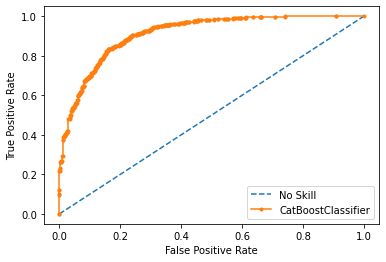

In [328]:
# calculate scores
ns_auc = roc_auc_score(target_test, predicted_sanity_test)
cat_auc = roc_auc_score(target_test, cat_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('LogisticRegression: ROC AUC=%.3f' % (cat_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(target_test, predicted_sanity_test)
cat_fpr, cat_tpr, _ = roc_curve(target_test, cat_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(cat_fpr, cat_tpr, marker='.', label='CatBoostClassifier')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [329]:
print("CatBoostClassifier test ROC-AUC: {:.3f}".format(
    roc_auc_score(target_test, cat_probs)))

In [330]:
cat_predicted = cat.predict(features_test)

print(classification_report(target_test, cat_predicted, digits=3))

In [333]:
df_cat_features = pd.DataFrame({'features': cat.feature_names_, 'score': cat.get_feature_importance()})
df_cat_features = df_cat_features.sort_values(by="score", ascending = False)

In [334]:
df_cat_features.head()

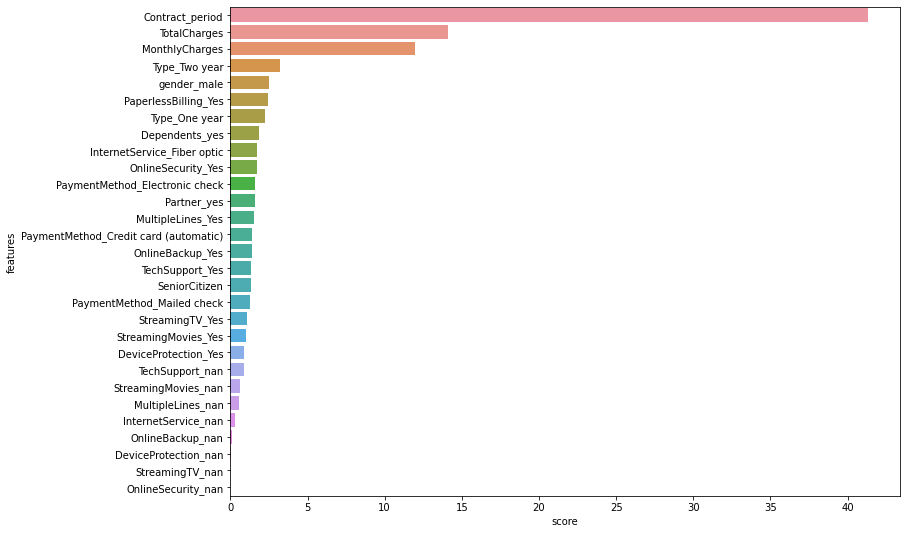

In [335]:
fig, ax = plt.subplots(figsize=(12, 9))
sns.barplot(ax=ax, x=df_cat_features["score"], y=df_cat_features["features"]);

<div class="alert alert-info">
    Update of results: CatBoostClassifier  ROC-AUC: 0.913, accuracy: 0.877. <br>
    The most improtant features: Contract_period, TotalCharges and MonthlyCharges
</div>

**Mini conclusion** <br> <a class="anchor" id="Mini_conclusion4.2"></a>
LogisticRegression ROC-AUC: 0.849, accuracy: 0.809. <br>
DecisionTreeClassifier ROC-AUC: 0.859, accuracy: 0.818. <br>
RandomForestClassifier ROC-AUC: 0.863, accuracy: 0.823. <br>
CatBoostClassifier  ROC-AUC: 0.913, accuracy: 0.877. <br>
The most improtant features: Contract_period, TotalCharges and MonthlyCharges <br>

<div class="alert alert-danger">
<s>    <b>Reviewer's comment</b><br>
    The modelling section is pretty good. You tried several different models and did some hyperparameter tuning. There are a couple of problems though:
    <ol><li>Cross-validation is done using the whole dataset. That's problematic, because if the test set intersect the cross-validation set, you are going to get a biased test set score. Cross-validation should be done using the train set instead.
        <li>The model should be evaluated on the test set only once: after all hyperparameter tuning (using cross-validation or a validation set) is finished. Otherwise, again we risk getting a biased test set score.
        <li>There is target leakage: combining begin_month and contract period gives you the end month. Almost perfect ROC-AUC of catboostclassifier and its feature importances confirm this
</div>

<div class="alert alert-info">
    1. Done cross validation only on train dataset and tuninig the parameters <br>
    2. Calculate metrics after tuning. <br>
    3. Problem with target leakage solved (we drop from features StartDate, so we can't restore target values)
</div>

<div class="alert alert-success">
    <b>Reviewer's comment V2</b><br>
    Excellent! All problems were fixed
</div>

# 5.Results <a class="anchor" id="results"></a>

1. Results of calculations <br>
LogisticRegression ROC-AUC: 0.849, accuracy: 0.809. <br>
DecisionTreeClassifier ROC-AUC: 0.859, accuracy: 0.818. <br>
RandomForestClassifier ROC-AUC: 0.863, accuracy: 0.823. <br>
BEST MODEL: **CatBoostClassifier  ROC-AUC: 0.913, accuracy: 0.877.** <br>
<br>
2. The most improtant features in CatBoostClassifier: <br>
Contract_period, TotalCharges and MonthlyCharges <br>
<br>
3. The developed model could help to to forecast their churn of clients.
<br><br>

[x] Have you performed all the steps? <br>
[x] Does the solution match the task condition? <br>
[x] Have you trained and tested the model correctly? <br>
[x] What is the quality score of the best model? <br>
[x] Have you kept to the project structure? <br>
[x] Have you kept the code neat?

# 6.Solution Report <a class="anchor" id="report"></a> 

In the report, please answer the following questions: <br>
[ ] What steps of the plan were performed and what steps were skipped (explain why)? <br>
[ ] What difficulties did you encounter and how did you manage to solve them? <br>
[ ] What were some of the key steps to solving the task? <br>
[ ] What is your final model and what quality score does it have? <br>
 <br>
Here are some of the criteria used by the team leader: <br>
Did you answer all the questions? <br>
Are the answers clear? <br>

**STEPS**
1. Import libraries.
2. Load data
3. EDA <br>
   3.1 Check general information: number of rows, type of data and if there are duplicates.
    - We found that we should change type of some columns.
    - We don't have exactly target column. We have only EndDate, and from it's values can understand if the contract is valid or not.
    3.2 We change type of data, merge it, create column of target.
    - We changed type of dates: StartDate and EndDate. And created parameter: period of contract + month and year when contracts were started.
    - We changet type of Total charges too, cause this column were as text type but should be a real number.
    - There were a little problem: some calues were just an empty string " ". We can't restore this values exactly, cause correlation of this parameter with the others wasn't so strong. And it is good, because if the correlation was strong, I likely drop this column from the features. Finally we drop this rows with " " values from dataset, number of this rows were extremely low ~ 0.1%, so it is not a problem.
    - We applied OHE on cathegorical parameters, to use them as features in ML models.
    - We merged data. After preprocessing it was easy.
    - we create target value from EndDate.
4. Develop models <br>
    4.1 We split features and target.
    - The problem was in that we should drop period of contract or startDate form features, in otherwise we could restore target, that could bring us to the leakage of data.
    4.2 We did sanity check model. <br>
    4.3 We developed Logistic regression, Decision tree Classifier, random forest classifier and catboost classifier model.
    - The scheme: we did cross-validation + tuning of parameters to find the best ones on train dataset, then fit model with the best parameters, then predict on test data values and find metrics.
    - We plotted some graphs to visualize results.
5. We made a conclusion
- We found the best model and compared metrics.
<br> <br>
We skipped xgboost: the reason is that I wait for the same result. But result is good enough. Based on the practice here in Yandex, I don't really understand the great difference between this boosting methods. I understanf, that some of them fit faster, some of them predict faster, some can work without OHE and so on, but there wasn't not information about the quality of the models. So, I just skipped this.<br>
I really want use keras (neural methods) for this classification task. As I understand we can use it, but I haven't GPU. So, I skipped it.<br>  

What were some of the key steps to solving the task? <br>
It is strange question. We can't miss some of those steps. Although... we can use catboost and skip OHE.

BEST MODEL: **CatBoostClassifier  ROC-AUC: 0.913, accuracy: 0.877.** <br>

I didn't understand for what reason there were additional assignement in the task. And why it wasn't mandatory.

**FINALLY** <br>
I want to say great thank for all reviewers. It was interesting to study here in Yandex Practicum. Although I live in Moscow, I'm glad to be here in the US part of Yandex Practicum. It keep my English on some level. <br>
I hope that all of this knowledge help me to change my job, despite the fact that in my work there is data science problems. <br> I want to be more data scientist.
